In [11]:
import pandas as pd
from siuba import *
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
from scipy.stats import iqr

#### Lendo os dados

In [12]:
df = pd.read_excel('base_2/base_2.xlsx') 
df_dic = pd.read_excel('base_2/dicionario_base_2.xlsx')

In [13]:
df_dic

,Descrição do problema,Unnamed: 1
0,Essa base contém informações para diferentes p...,NaN
1,NaN,NaN
2,Dicionário da base,NaN
3,Variável,Descrição
4,pais,país
5,continente,continente
6,ano,ano: vai de 1952 até 2007 de 5 em 5 anos
7,expectativa_de_vida,expectativa de vida no ano de nascimento em anos
8,populacao,população do país
9,pib_per_capita,"PIB per capita (USD, PPC 2005)"


In [14]:
df.head(1)

,país,continente,ano,expectativa_de_vida,população,pib_per_cápita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


#### Análise dos dados

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   país                 1704 non-null   object 
 1   continente           1704 non-null   object 
 2   ano                  1704 non-null   int64  
 3   expectativa_de_vida  1704 non-null   float64
 4   população            1704 non-null   int64  
 5   pib_per_cápita       1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [16]:
df.describe()

,ano,expectativa_de_vida,população,pib_per_cápita
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [17]:
df.corr()

,ano,expectativa_de_vida,população,pib_per_cápita
ano,1.000000,0.435611,0.082308,0.227318
expectativa_de_vida,0.435611,1.000000,0.064955,0.583706
população,0.082308,0.064955,1.000000,-0.025600
pib_per_cápita,0.227318,0.583706,-0.025600,1.000000


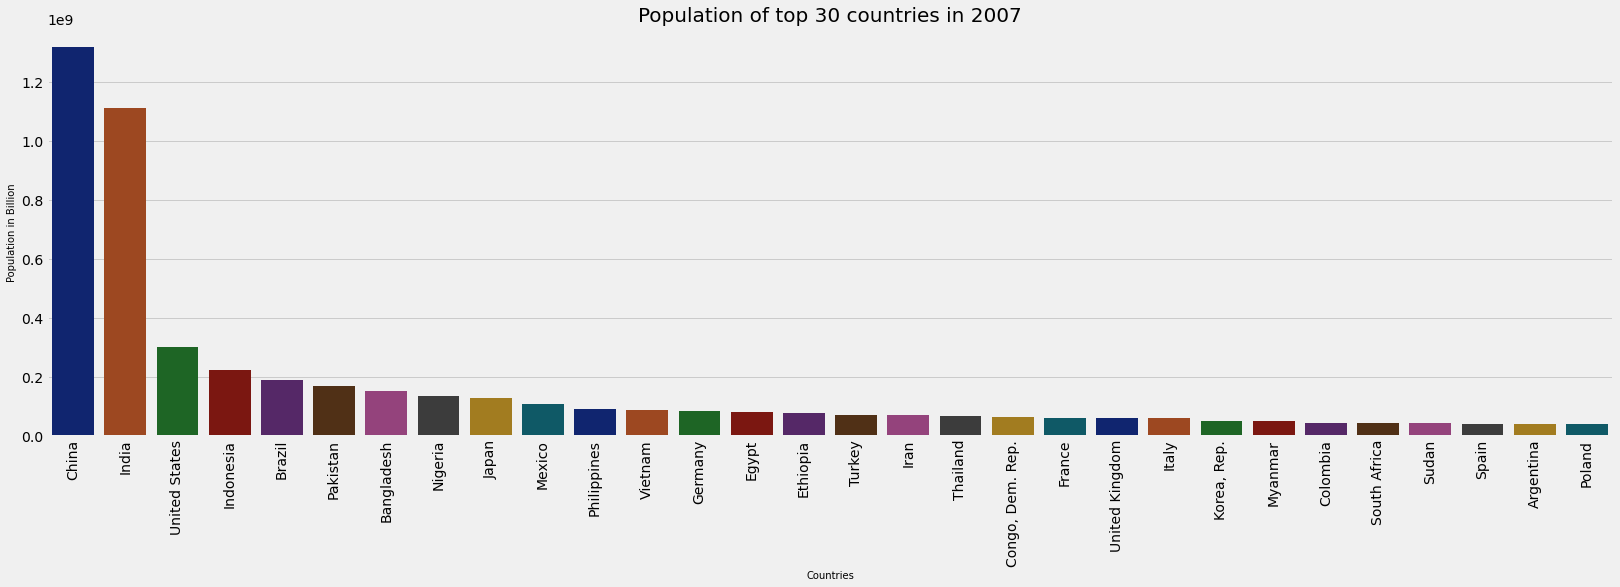

In [18]:
current_population = df[df['ano'] == 2007]

# 2007 population data
most = current_population.nlargest(30, 'população')

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = most['país'], y = most['população'], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_title(label = 'Population of top 30 countries in 2007', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [19]:
most_pop = current_population.nlargest(10, 'população')

top_10_countries = most_pop['país'].unique()
top10_popultion = df[df['país'].isin(top_10_countries)][['ano', 'país', 'população']]
top10_popultion_pivot = top10_popultion.pivot(index='ano', columns='país', values='população')

In [21]:
top10_popultion_pivot =  (top10_popultion_pivot >>
    select("China", "India", "United States", "Indonesia", "Brazil", "Pakistan",
          "Bangladesh", "Nigeria", "Japan", "Mexico") )
top10_popultion_pivot.style.background_gradient(cmap='PuBu')

país,China,India,United States,Indonesia,Brazil,Pakistan,Bangladesh,Nigeria,Japan,Mexico
ano,,,,,,,,,,
1952,556263527,372000000,157553000,82052000,56602560,41346560,46886859,33119096,86459025,30144317
1957,637408000,409000000,171984000,90124000,65551171,46679944,51365468,37173340,91563009,35015548
1962,665770000,454000000,186538000,99028000,76039390,53100671,56839289,41871351,95831757,41121485
1967,754550000,506000000,198712000,109343000,88049823,60641899,62821884,47287752,100825279,47995559
1972,862030000,567000000,209896000,121282000,100840058,69325921,70759295,53740085,107188273,55984294
1977,943455000,634000000,220239000,136725000,114313951,78152686,80428306,62209173,113872473,63759976
1982,1000281000,708000000,232187835,153343000,128962939,91462088,93074406,73039376,118454974,71640904
1987,1084035000,788000000,242803533,169276000,142938076,105186881,103764241,81551520,122091325,80122492
1992,1164970000,872000000,256894189,184816000,155975974,120065004,113704579,93364244,124329269,88111030


Text(0, 0.5, 'Expectativa de Vida')

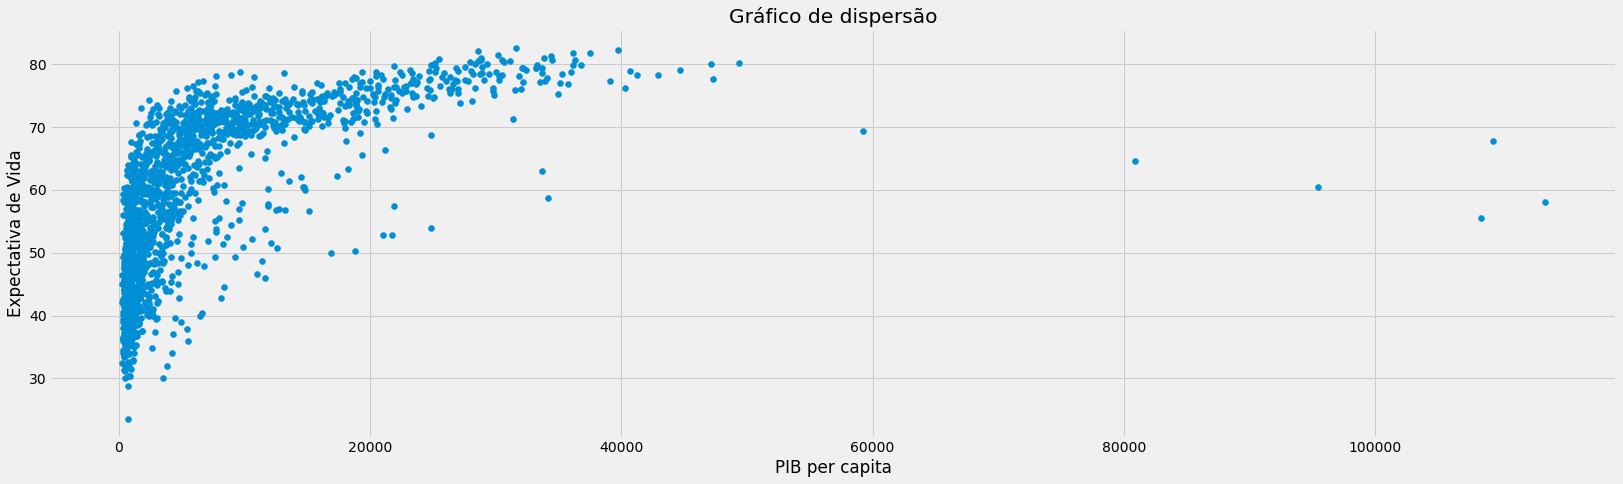

In [22]:
plt.scatter(df["pib_per_cápita"], df["expectativa_de_vida"])
plt.title("Gráfico de dispersão")
plt.xlabel("PIB per capita")
plt.ylabel("Expectativa de Vida")

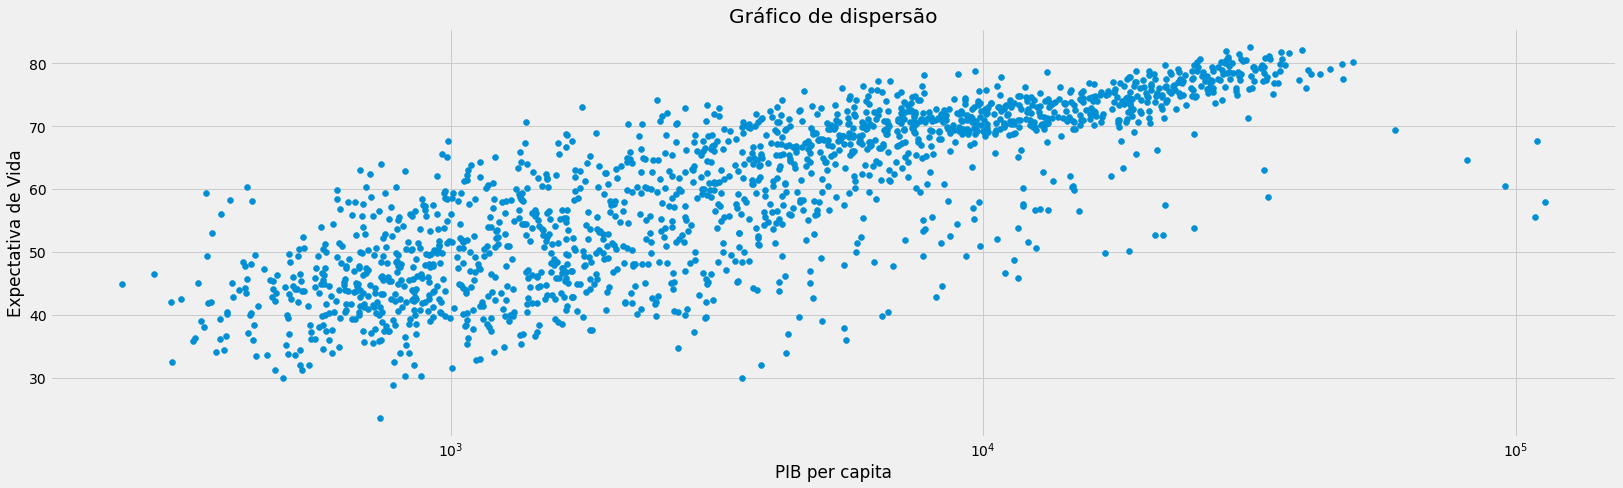

In [316]:
plt.scatter(df["pib_per_cápita"], df["expectativa_de_vida"])
plt.title("Gráfico de dispersão")
plt.xlabel("PIB per capita")
plt.ylabel("Expectativa de Vida")
plt.xscale('log')

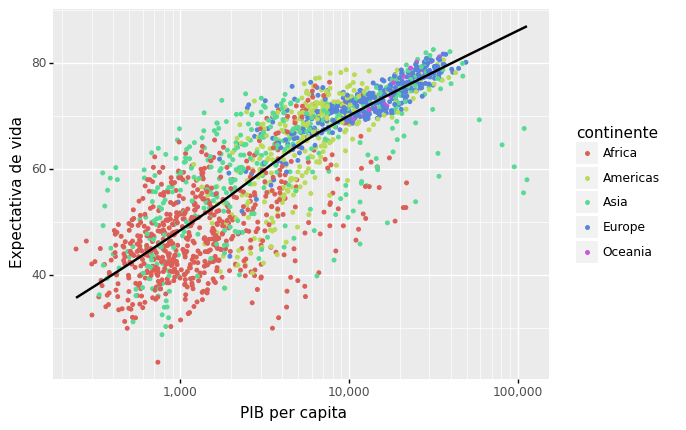

<ggplot: (111369633564)>

In [181]:
import locale
locale.setlocale(locale.LC_ALL, "en_US") # formata escritas de dinheiro, horário, data, conforme a região escolhida

(df >>
    ggplot(aes(x = "pib_per_cápita", y = "expectativa_de_vida")) +
        geom_point(aes(color = "continente"), size = 1) +
        geom_smooth(method = "lowess", se = False) +
        scale_x_log10(labels = lambda gdp: [locale.format_string("%d", x, grouping = True) for x in gdp]) +
        labs(x = "PIB per capita", y = "Expectativa de vida", titile = "Expectativa de vida x PIB"))

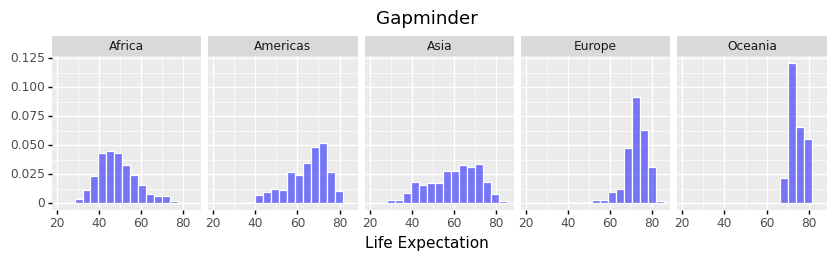

<ggplot: (111369639891)>

In [182]:
fd = 2 * iqr(df["expectativa_de_vida"]) / len(df)**(1/3)

(df >>
    ggplot(aes(x = "expectativa_de_vida", y = "stat(density)")) +
        geom_histogram(binwidth = fd, fill = "blue", color = "white", alpha = 0.5) +
        labs(x = "Life Expectation", y = "", title = "Gapminder") +
        facet_grid(". ~ continente") +
        theme(figure_size = (10, 2)))

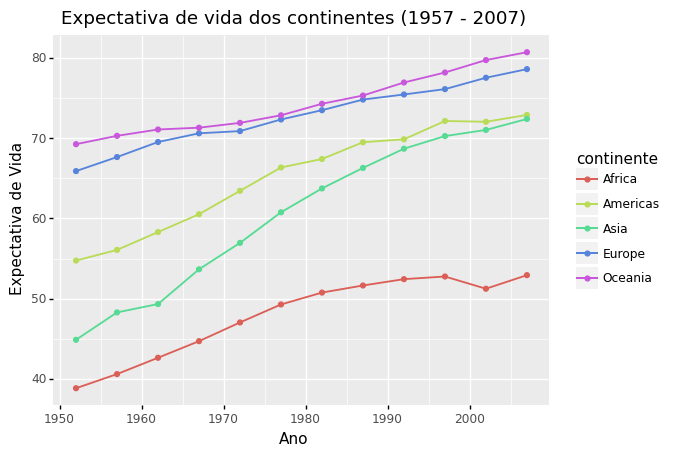

In [183]:
(df >>
    group_by(_.continente, _.ano) >>
    summarize(median_life_exp = _.expectativa_de_vida.median()) >>
    ggplot(aes(x = "ano", y = "median_life_exp", color = "continente")) +
        geom_line(size = 0.75) +
        geom_point(size = 1.5) +
        labs(x = "Ano", y = "Expectativa de Vida", title = "Expectativa de vida dos continentes (1957 - 2007)")).draw();



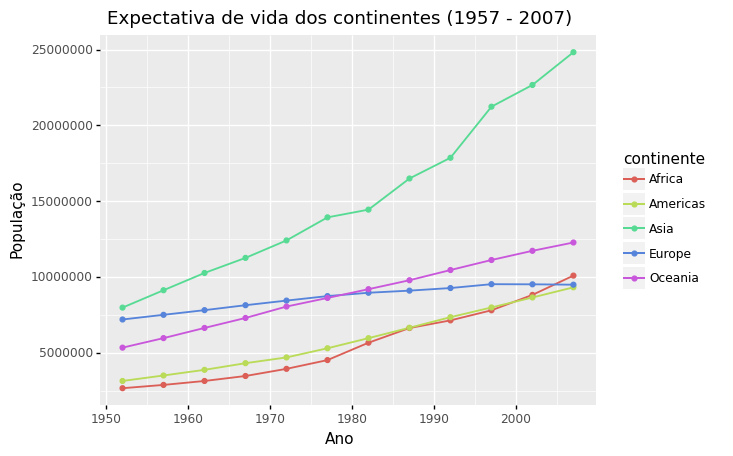

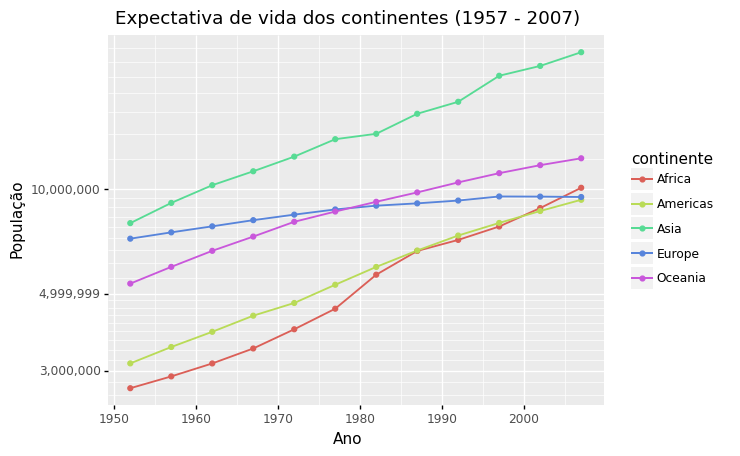

In [184]:
(df >>
    group_by(_.continente, _.ano) >>
    summarize(pop = _.população.median()) >>
    ggplot(aes(x = "ano", y = "pop", color = "continente")) +
        geom_line(size = 0.75) +
        geom_point(size = 1.5) +
        labs(x = "Ano", y = "População", title = "Expectativa de vida dos continentes (1957 - 2007)")).draw();

(df >>
    group_by(_.continente, _.ano) >>
    summarize(pop = _.população.median()) >>
    ggplot(aes(x = "ano", y = "pop", color = "continente")) +
        geom_line(size = 0.75) +
        geom_point(size = 1.5) +
        scale_y_log10(labels = lambda pop: [locale.format_string("%d", x, grouping = True) for x in pop]) +
        labs(x = "Ano", y = "População", title = "Expectativa de vida dos continentes (1957 - 2007)")).draw();

In [350]:
#países da africa
z = df[df["país"] == "Zimbabwe"]
b = df[df["país"] == "Botswana"]
r =df[df["país"] == "Rwanda"]
e =df[df["país"] == "Nigeria"]
l =df[df["país"] == "Lesotho"]

In [351]:
df = df.set_index('país')
a = df.loc[["Zimbabwe", "Botswana", "Rwanda", "Lesotho", "Nigeria", "Egypt", "Kenya"], 
           ["ano", "expectativa_de_vida"]]

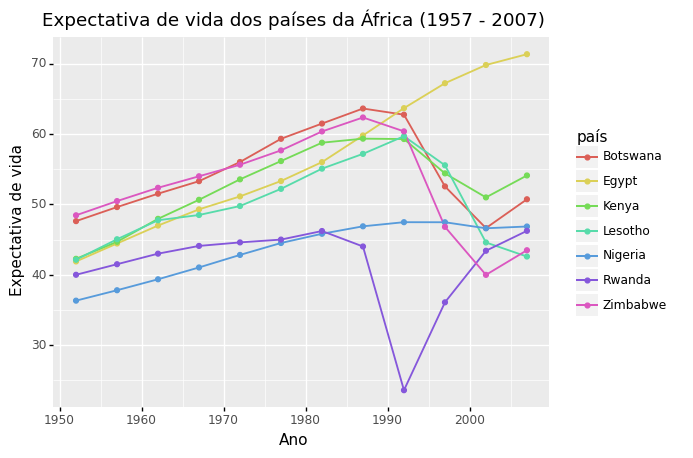

In [352]:
(a >>
    group_by(_.país, _.ano) >>
    summarize(pop = _.expectativa_de_vida) >>
    ggplot(aes(x = "ano", y = "pop", color = "país")) +
        geom_line(size = 0.75) +
        geom_point(size = 1.5) +
        labs(x = "Ano", y = "Expectativa de vida", title = "Expectativa de vida dos países da África (1957 - 2007)")).draw();


https://mundoeducacao.uol.com.br/geografia/a-aids-na-africa.htm

In [339]:
aids = pd.read_csv('deaths-and-new-cases-of-hiv.csv') 

In [340]:
aids = aids.drop(columns= { 
           'Prevalence - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
            'Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'
})

In [341]:
aids = aids.rename(columns = {
   'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)' : 'Deaths'
})

In [342]:
aids = aids.set_index('Entity')
aids_af = aids.loc[["Botswana", "Rwanda", "Lesotho","Zimbabwe", "Egypt"], 
           ["Year", "Deaths"]]


In [343]:
aids_af = aids_af[aids_af["Year"] < 2008]

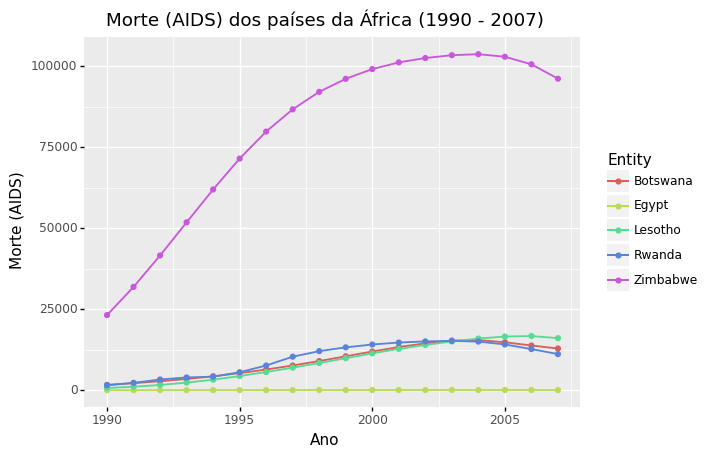

In [344]:
(aids_af >>
    group_by(_.Entity, _.Year) >>
    summarize(pop = _.Deaths) >>
    ggplot(aes(x = "Year", y = "pop", color = "Entity")) +
        geom_line(size = 0.75) +
        geom_point(size = 1.5) +
        labs(x = "Ano", y = "Morte (AIDS)", title = "Morte (AIDS) dos países da África (1990 - 2007)")).draw();


In [333]:

aids_af = aids.loc[["Botswana", "Rwanda", "Lesotho", "Egypt"], 
           ["Year", "Deaths"]]


In [334]:
aids_af = aids_af[aids_af["Year"] < 2008]

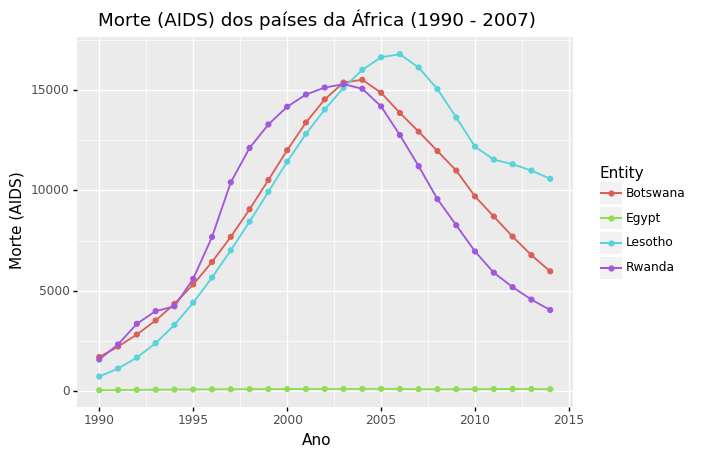

In [335]:
(aids_af >>
    group_by(_.Entity, _.Year) >>
    summarize(pop = _.Deaths) >>
    ggplot(aes(x = "Year", y = "pop", color = "Entity")) +
        geom_line(size = 0.75) +
        geom_point(size = 1.5) +
        labs(x = "Ano", y = "Morte (AIDS)", title = "Morte (AIDS) dos países da África (1990 - 2007)")).draw();


In [274]:
mundo_aids = pd.read_csv('share-deaths-aids.csv') 

In [275]:
mundo_aids = mundo_aids.rename(columns = {
   'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)' : 'Deaths'
})

In [276]:
mundo_aids = mundo_aids[mundo_aids["Year"] == 2002]

In [282]:
fig = px.choropleth(mundo_aids, locations="Entity", 
                    locationmode='country names', color="Deaths", 
                    hover_name="Deaths",
                    color_continuous_scale="blues", 
                    title='Países e mortes de AIDS')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [278]:
df = pd.read_excel('base_2/base_2.xlsx') 

In [279]:
df

,país,continente,ano,expectativa_de_vida,população,pib_per_cápita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [283]:
df = df[df["ano"] == 2002]
fig = px.choropleth(df, locations="país", 
                    locationmode='country names', color="expectativa_de_vida", 
                    hover_name="expectativa_de_vida",
                    color_continuous_scale="blues", 
                    title='Expectativa de vida dos países')
fig.update(layout_coloraxis_showscale=True)
fig.show()